In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


colors = pd.read_csv('../datas/colors.csv')

print(colors.head())


   id            name     rgb is_trans
0  -1         Unknown  0033B2        f
1   0           Black  05131D        f
2   1            Blue  0055BF        f
3   2           Green  237841        f
4   3  Dark Turquoise  008F9B        f


In [8]:
num_colors = colors['name'].nunique()
print("Number of distinct colors:", num_colors)
colors_summary = colors.groupby('is_trans').count()
colors_summary

Number of distinct colors: 135


,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


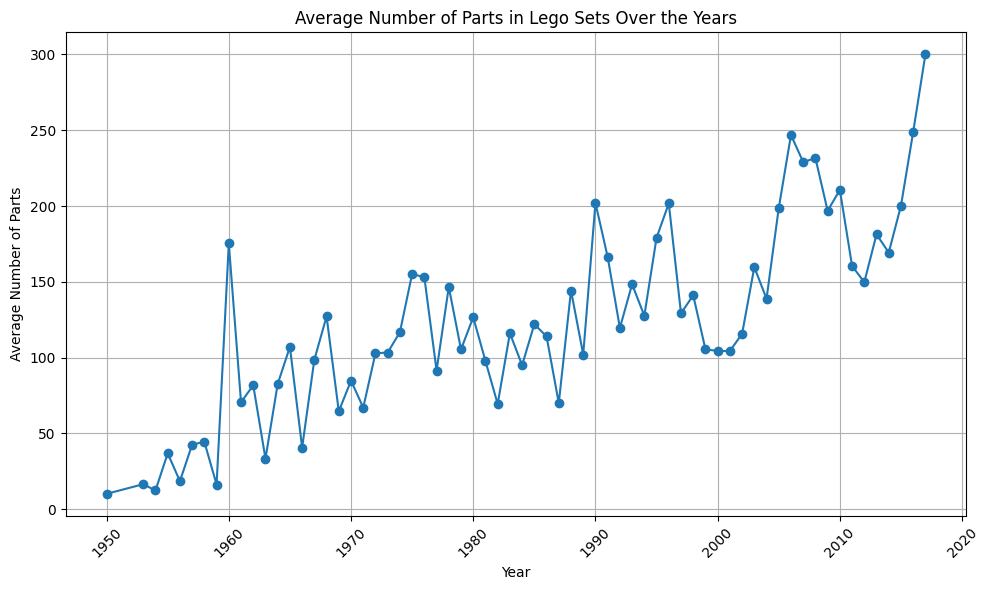

   year  num_parts
0  1950  10.142857
1  1953  16.500000
2  1954  12.357143
3  1955  36.857143
4  1956  18.500000


In [5]:
sets = pd.read_csv('../datas/sets.csv')

parts_by_year = sets.groupby('year')['num_parts'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(parts_by_year['year'], parts_by_year['num_parts'], marker='o', linestyle='-')
plt.title('Average Number of Parts in Lego Sets Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Number of Parts')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(parts_by_year.head())


In [9]:
colors_df = pd.read_csv('../datas/colors.csv')
sets_df = pd.read_csv('../datas/sets.csv')
sns.set(style="whitegrid")


C:\Users\Asus\AppData\Local\Temp\ipykernel_18640\149383056.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=color_counts.index, y=color_counts.values, palette='viridis')


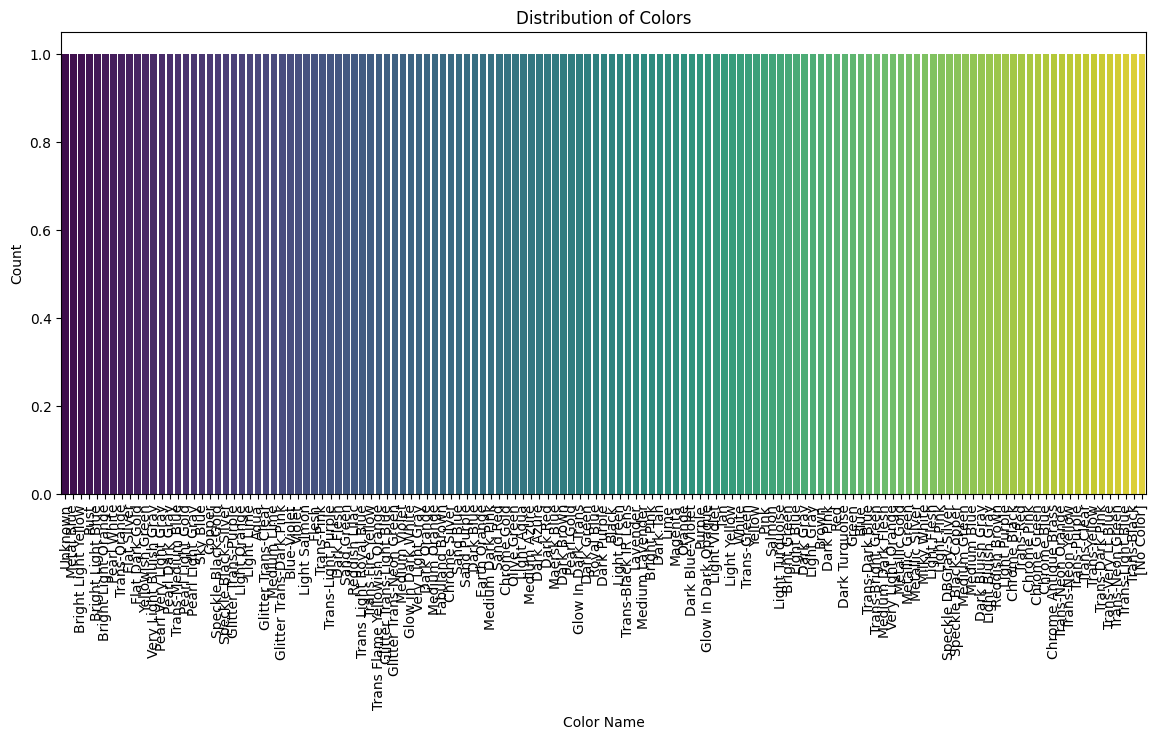

In [14]:
# Plotting the number of distinct colors
colors_df['is_trans'] = colors_df['is_trans'].map({'f': 'Opaque', 't': 'Transparent'})
color_counts = colors_df['name'].value_counts()
plt.figure(figsize=(14, 6))
sns.barplot(x=color_counts.index, y=color_counts.values, palette='viridis')
plt.title('Distribution of Colors')
plt.xlabel('Color Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

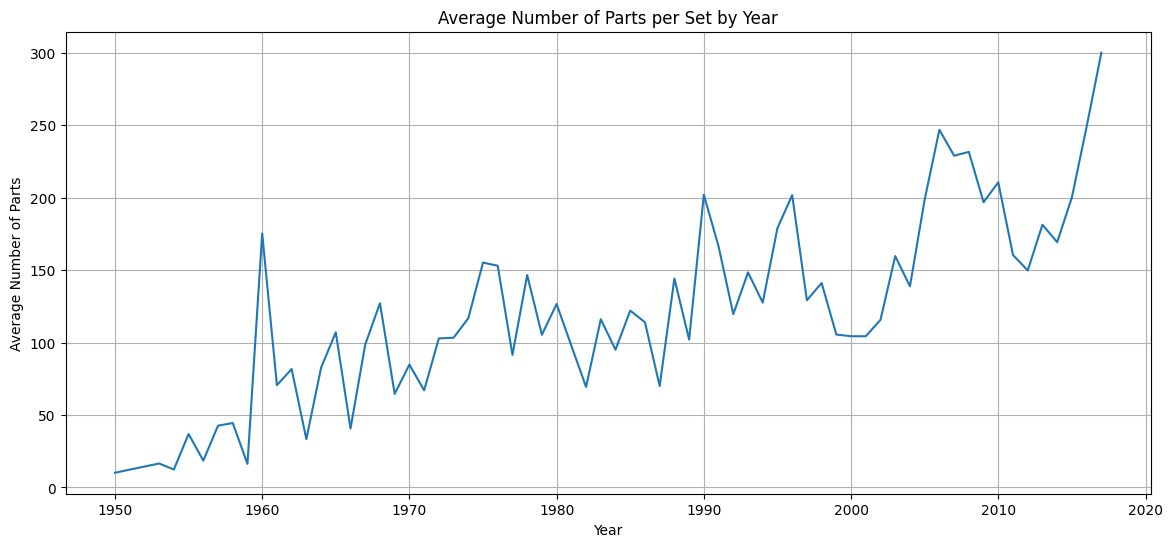

In [17]:
# Plotting the average number of parts per set by year
plt.figure(figsize=(14, 6))
parts_by_year = sets_df.groupby('year')['num_parts'].mean().reset_index()
sns.lineplot(x=parts_by_year['year'], y=parts_by_year['num_parts'])
plt.title('Average Number of Parts per Set by Year')
plt.xlabel('Year')
plt.ylabel('Average Number of Parts')
plt.grid(True)
plt.show()

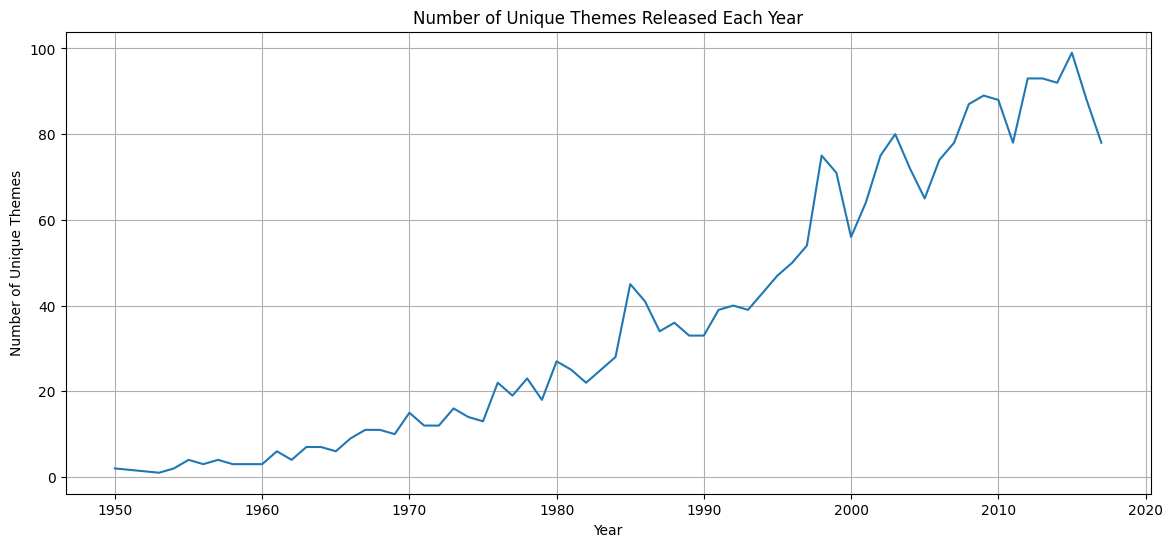

In [18]:
# Plotting the number of unique themes released each year
plt.figure(figsize=(14, 6))
themes_by_year = sets_df.groupby('year')['theme_id'].nunique().reset_index()
sns.lineplot(x=themes_by_year['year'], y=themes_by_year['theme_id'])
plt.title('Number of Unique Themes Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Themes')
plt.grid(True)
plt.show()

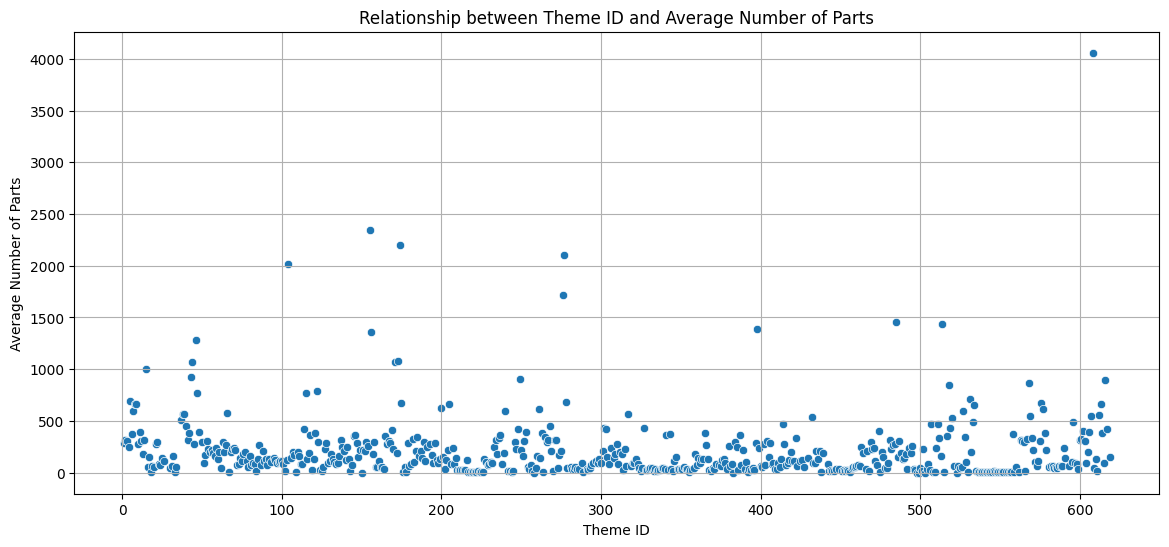

In [19]:
# Relationship between the number of parts and the popularity of themes
theme_popularity = sets_df.groupby('theme_id')['num_parts'].mean().reset_index()
theme_popularity.columns = ['theme_id', 'average_num_parts']

plt.figure(figsize=(14, 6))
sns.scatterplot(x='theme_id', y='average_num_parts', data=theme_popularity)
plt.title('Relationship between Theme ID and Average Number of Parts')
plt.xlabel('Theme ID')
plt.ylabel('Average Number of Parts')
plt.grid(True)
plt.show()

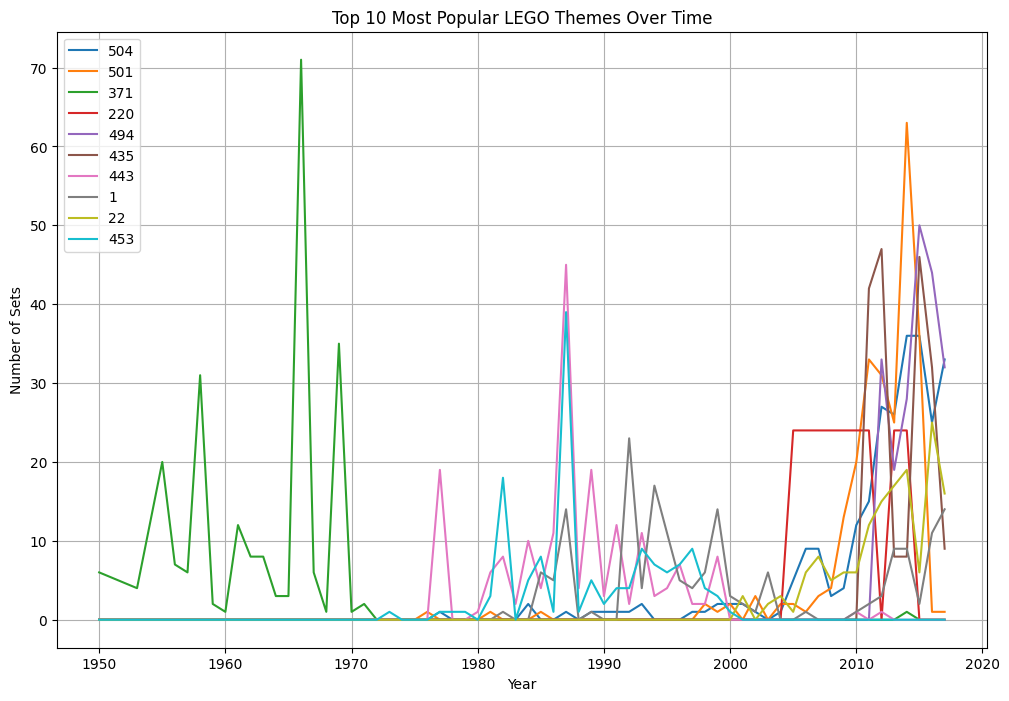

In [21]:
# plot the distribution of themes over the years
def plot_themes_over_time(sets_df):
    themes_per_year = sets_df.groupby(['year', 'theme_id']).count()['set_num'].unstack().fillna(0)
    most_popular_themes = themes_per_year.sum().sort_values(ascending=False).head(10).index
    popular_themes = themes_per_year[most_popular_themes]
    
    plt.figure(figsize=(12, 8))
    for theme in popular_themes.columns:
        plt.plot(popular_themes.index, popular_themes[theme], label=theme)
    plt.title('Top 10 Most Popular LEGO Themes Over Time')
    plt.xlabel('Year')
    plt.ylabel('Number of Sets')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_themes_over_time(sets_df)


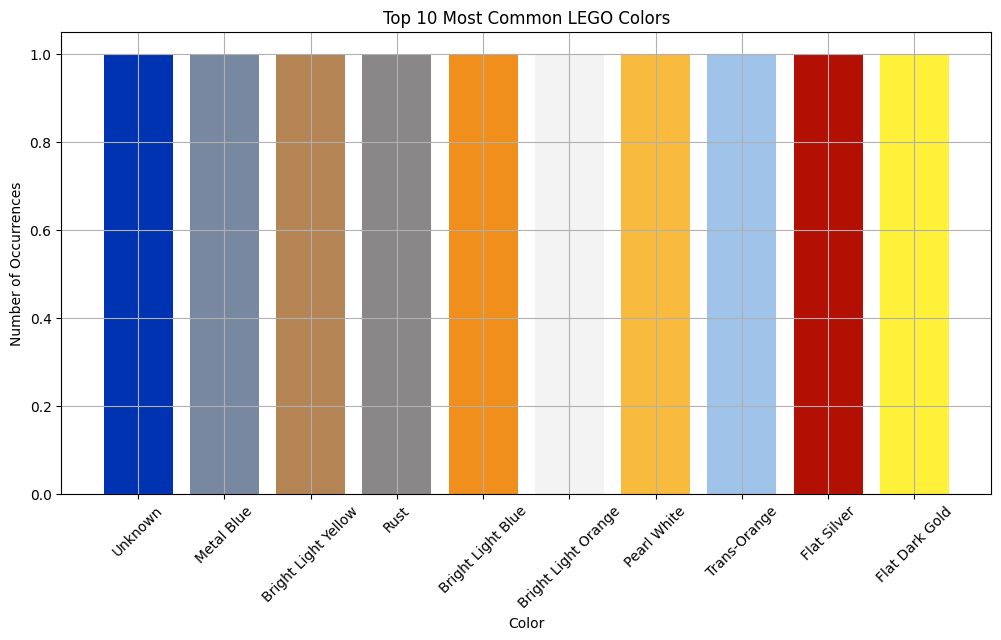

In [35]:
# plot the most common colors in LEGO sets
def plot_most_common_colors(colors_df):
    color_counts = colors_df['name'].value_counts().head(10)
    most_common_colors = colors_df[colors_df['name'].isin(color_counts.index)]
    plt.figure(figsize=(12, 6))
    plt.bar(color_counts.index, color_counts.values, color=[f'#{rgb}' for rgb in most_common_colors['rgb']])
    plt.title('Top 10 Most Common LEGO Colors')
    plt.xlabel('Color')
    plt.ylabel('Number of Occurrences')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

plot_most_common_colors(colors_df)


<Figure size 1400x800 with 0 Axes>

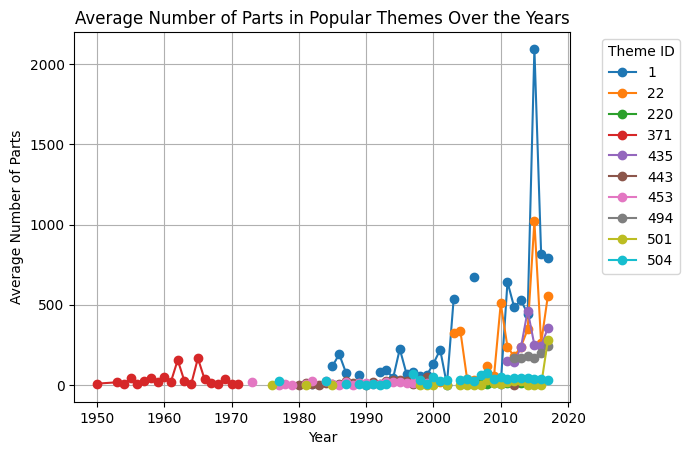

In [39]:
# Identifying the most popular themes by the number of sets
popular_themes = sets_df['theme_id'].value_counts().head(10).index
popular_themes_sets = sets_df[sets_df['theme_id'].isin(popular_themes)]

# Average number of parts in the most popular themes over the years
theme_parts_by_year = popular_themes_sets.groupby(['year', 'theme_id'])['num_parts'].mean().unstack()

plt.figure(figsize=(14, 8))
theme_parts_by_year.plot(marker='o')
plt.title('Average Number of Parts in Popular Themes Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Number of Parts')
plt.legend(title='Theme ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

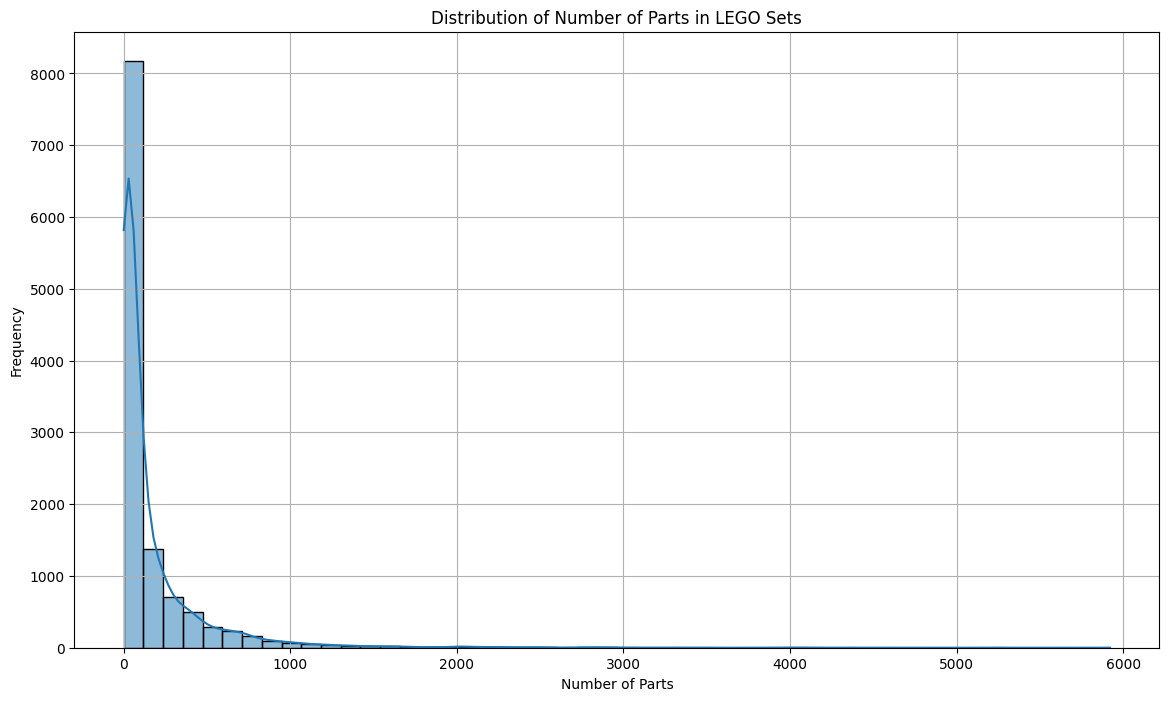

In [25]:
# Part of distribution of number parts in lego sets
plt.figure(figsize=(14, 8))
sns.histplot(data=sets_df, x='num_parts', bins=50, kde=True)
plt.title('Distribution of Number of Parts in LEGO Sets')
plt.xlabel('Number of Parts')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

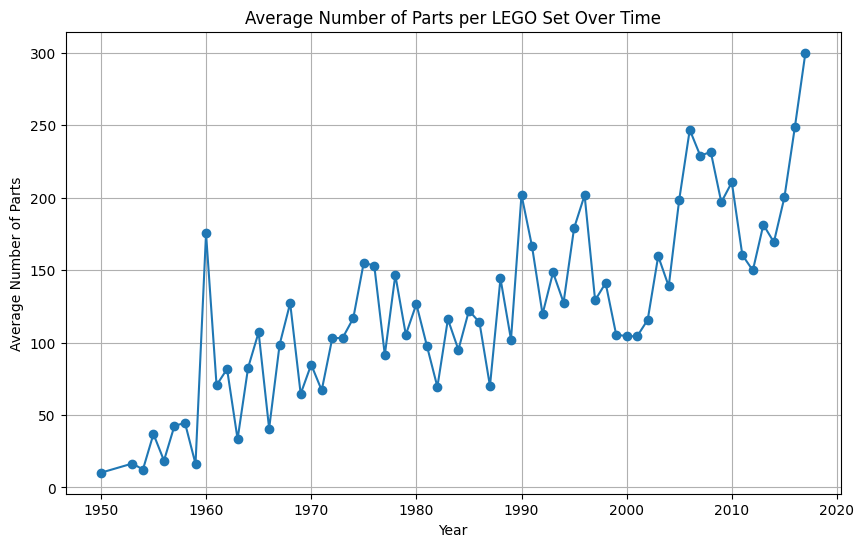

In [41]:
#Function to plot the average number of parts per set each year
def plot_parts_per_year(sets_df):
    parts_per_year = sets_df.groupby('year')['num_parts'].mean()
    plt.figure(figsize=(10, 6))
    plt.plot(parts_per_year.index, parts_per_year.values, marker='o')
    plt.title('Average Number of Parts per LEGO Set Over Time')
    plt.xlabel('Year')
    plt.ylabel('Average Number of Parts')
    plt.grid(True)
    plt.show()

plot_parts_per_year(sets_df)

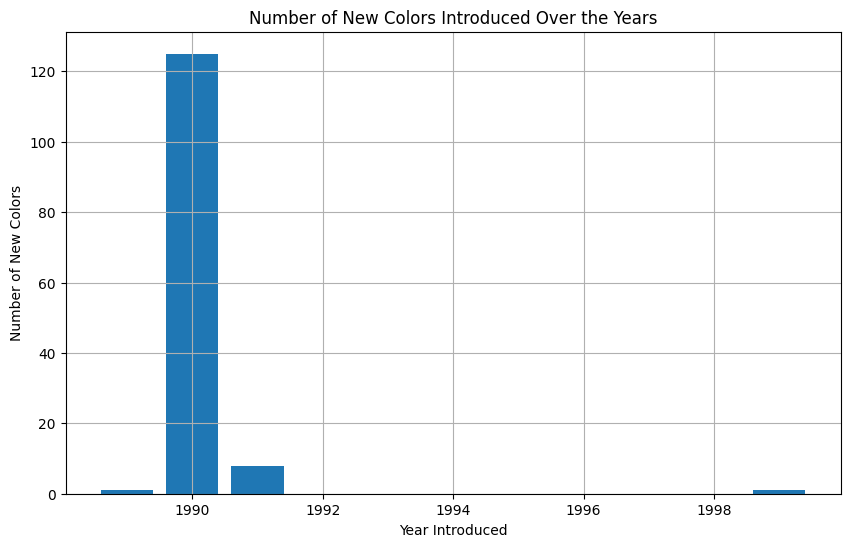

In [42]:
# Function to plot the number of new colors introduced each year
def plot_new_colors_per_year(colors_df):
    colors_df['year_introduced'] = colors_df['id'].apply(lambda x: 1990 + x//1000)  # Assuming an ID system for year
    new_colors_per_year = colors_df.groupby('year_introduced').count()['name']
    plt.figure(figsize=(10, 6))
    plt.bar(new_colors_per_year.index, new_colors_per_year.values)
    plt.title('Number of New Colors Introduced Over the Years')
    plt.xlabel('Year Introduced')
    plt.ylabel('Number of New Colors')
    plt.grid(True)
    plt.show()

plot_new_colors_per_year(colors_df)


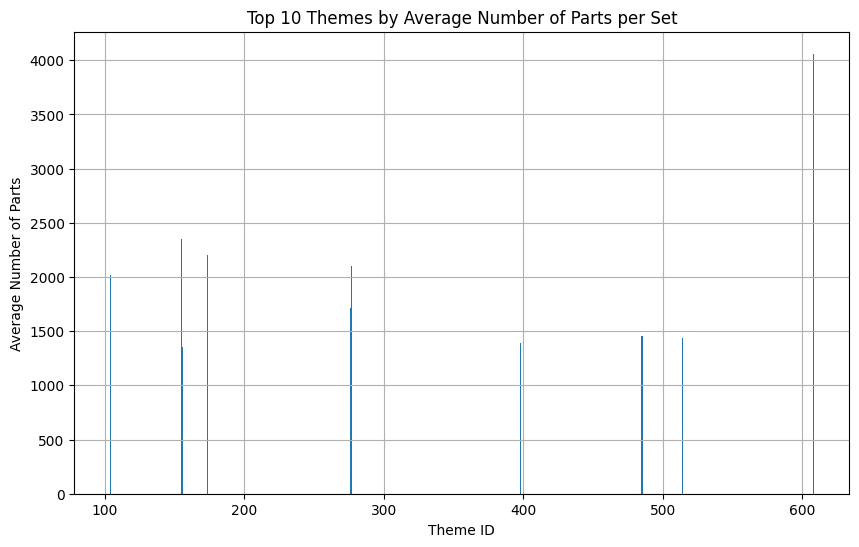

In [43]:
# Function to plot the average number of parts per set by theme
def plot_complexity_by_theme(sets_df):
    parts_per_theme = sets_df.groupby('theme_id')['num_parts'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    plt.bar(parts_per_theme.index, parts_per_theme.values)
    plt.title('Top 10 Themes by Average Number of Parts per Set')
    plt.xlabel('Theme ID')
    plt.ylabel('Average Number of Parts')
    plt.grid(True)
    plt.show()

plot_complexity_by_theme(sets_df)


In [44]:
# Function to perform correlation analysis between year and number of parts
def correlation_analysis(sets_df):
    correlation = sets_df[['year', 'num_parts']].corr()
    return correlation

correlation = correlation_analysis(sets_df)
print(correlation)


               year  num_parts
year       1.000000   0.121614
num_parts  0.121614   1.000000


<Figure size 1400x800 with 0 Axes>

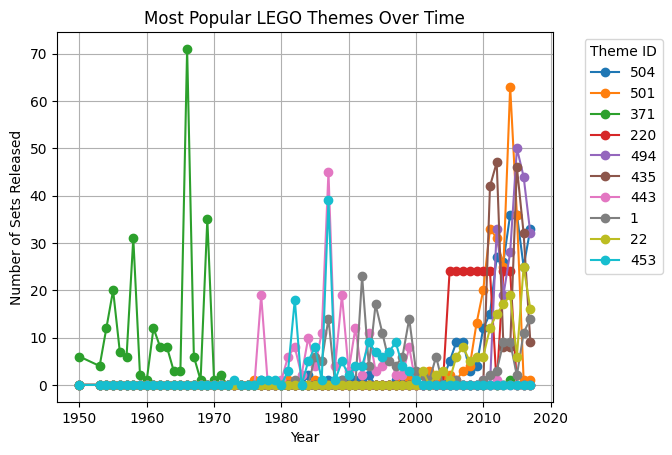

In [45]:
sets_per_theme_year = sets_df.groupby(['year', 'theme_id']).size().unstack(fill_value=0)

# Identify the most popular themes by the total number of sets released
most_popular_themes = sets_per_theme_year.sum().sort_values(ascending=False).head(10).index
popular_themes_over_time = sets_per_theme_year[most_popular_themes]

# Plotting the popularity of the most popular themes over time
plt.figure(figsize=(14, 8))
popular_themes_over_time.plot(marker='o')
plt.title('Most Popular LEGO Themes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Sets Released')
plt.legend(title='Theme ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

<Figure size 1400x800 with 0 Axes>

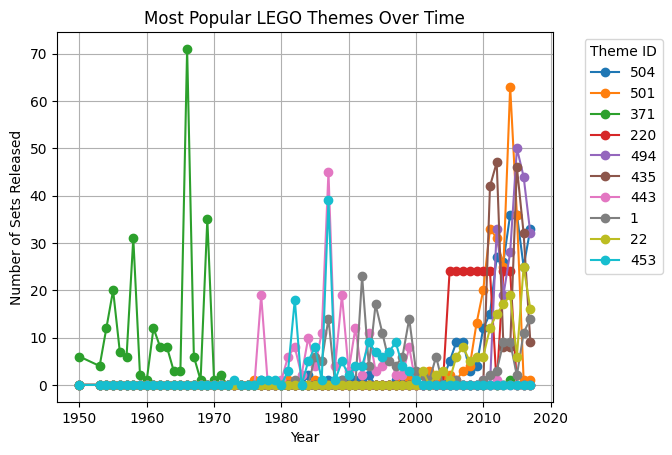

C:\Users\Asus\AppData\Local\Temp\ipykernel_18640\2780874069.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_parts_per_theme.index, y=avg_parts_per_theme.values, palette='viridis')


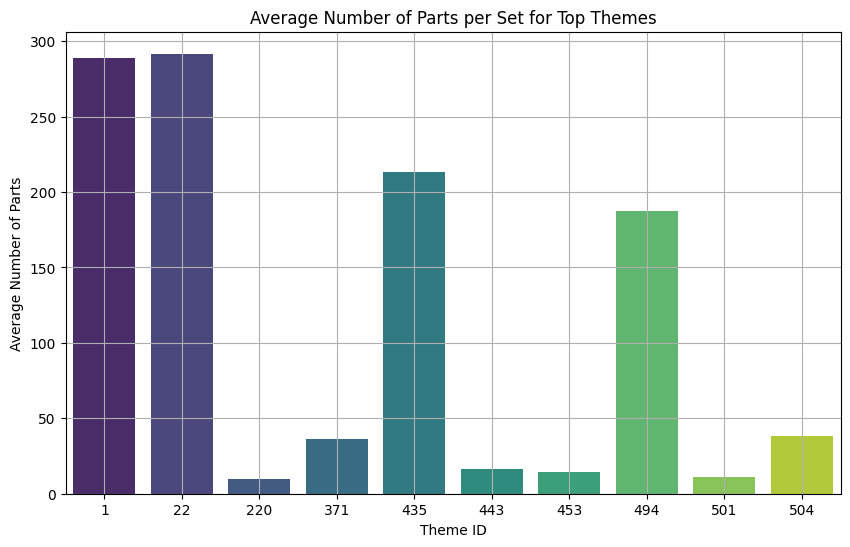

In [47]:
top_themes_data = sets_df[sets_df['theme_id'].isin(most_popular_themes)]

# Analyzing the average number of parts per set for these themes
avg_parts_per_theme = top_themes_data.groupby('theme_id')['num_parts'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_parts_per_theme.index, y=avg_parts_per_theme.values, palette='viridis')
plt.title('Average Number of Parts per Set for Top Themes')
plt.xlabel('Theme ID')
plt.ylabel('Average Number of Parts')
plt.grid(True)
plt.show()


<Figure size 1400x800 with 0 Axes>

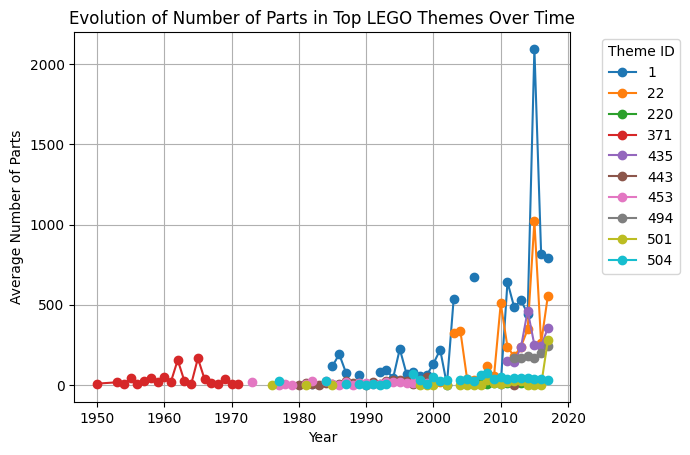

In [48]:
# Evolution of the number of parts in top themes over time
parts_in_top_themes_over_time = top_themes_data.groupby(['year', 'theme_id'])['num_parts'].mean().unstack()

plt.figure(figsize=(14, 8))
parts_in_top_themes_over_time.plot(marker='o')
plt.title('Evolution of Number of Parts in Top LEGO Themes Over Time')
plt.xlabel('Year')
plt.ylabel('Average Number of Parts')
plt.legend(title='Theme ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()